# Listing of libraries

In [11]:
import csv
import pandas as pd
import numpy as np
import ast
import json
import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt



# Extracting features

In [12]:
with open('/Users/shruti6991/Desktop/523 project/saxs.csv', newline='') as csvfile:
    rawdata = pd.read_csv(csvfile)
    dataframe = pd.DataFrame(rawdata, columns = ['item','sample','metadata_extract','linecut_qr'])
    itemdata = dataframe['item']
    sampledata = dataframe['sample']
    itemdata = itemdata.str.split('_', expand=True)
    featuredata = pd.DataFrame(itemdata)
    featuredata.columns = ['type', 'name','theta','annealing_time','annealing_temperature','time','sequenceid','8','9','10','11','12']
    featuredata = featuredata.drop(labels=['8','9','10','11','12'], axis=1)

# Extraction of linecut_qr features

In [13]:
linecutfeatures = pd.DataFrame(dataframe['linecut_qr'])
print(linecutfeatures.shape)
linecutfeatures = linecutfeatures.dropna()
linecutfeatures.to_csv('/Users/shruti6991/Desktop/523 project/linecutfeature.csv',index = False)
print(linecutfeatures.shape)
newDF = pd.DataFrame()

(5535, 1)
(1801, 1)


# Dropping down NULL value samples

In [14]:
newDF['samplename'] = sampledata
newDF['linecutfeatures'] = linecutfeatures
newDF = newDF.dropna()
newDF = newDF.drop('linecutfeatures',axis = 1)
print(newDF.shape)



(1801, 1)


# 8 recorded features as written below

In [15]:
print(newDF.shape)
fit_peaks_prefactor1 = []
fit_peaks_d0 = []
fit_peaks_chi_squared = []
fit_peaks_grain_size = []
fit_peaks_sigma1 = []
fit_peaks_prefactor_total = []
fit_peaks_x_center1 = []
totaltime = []

with open('/Users/shruti6991/Desktop/523 project/linecutfeature.csv', newline='') as csvfile:    
    rawdata = pd.read_csv(csvfile)
    x = rawdata['linecut_qr']
    for row in x:
        d = eval(row)
        #print(d)
        #print(row)
        fit_peaks_prefactor1.append(d['data']['fit_peaks_prefactor1'])
        fit_peaks_d0.append(d['data']['fit_peaks_d0'])
        fit_peaks_chi_squared.append(d['data']['fit_peaks_chi_squared'])
        fit_peaks_grain_size.append(d['data']['fit_peaks_grain_size'])
        fit_peaks_sigma1.append(d['data']['fit_peaks_sigma1'])
        fit_peaks_prefactor_total.append(d['data']['fit_peaks_prefactor_total'])
        fit_peaks_x_center1.append(d['data']['fit_peaks_x_center1'])
        totaltime.append(d['time'])

(1801, 1)


In [16]:
newDF['fit_peaks_prefactor1'] = fit_peaks_prefactor1
newDF['fit_peaks_d0'] = fit_peaks_d0
newDF['fit_peaks_chi_squared'] = fit_peaks_chi_squared
newDF['fit_peaks_grain_size'] = fit_peaks_grain_size
newDF['fit_peaks_sigma1'] = fit_peaks_sigma1
newDF['fit_peaks_prefactor_total'] = fit_peaks_prefactor_total
newDF['fit_peaks_x_center1'] = fit_peaks_x_center1
newDF['totaltime'] = totaltime


# Saving the feature table in CSV file

In [17]:
print(newDF.shape)
newDF.to_csv('/Users/shruti6991/Desktop/523 project/feature.csv',index = False)


(1801, 9)


# Calculating pearson cofficient

In [18]:
newDF.corr(method='pearson', min_periods=1)


,fit_peaks_prefactor1,fit_peaks_d0,fit_peaks_chi_squared,fit_peaks_grain_size,fit_peaks_sigma1,fit_peaks_prefactor_total,fit_peaks_x_center1,totaltime
fit_peaks_prefactor1,1.000000,0.139317,0.861440,-0.027424,-0.117009,1.000000,-0.186629,0.113061
fit_peaks_d0,0.139317,1.000000,0.082506,0.093955,-0.376172,0.139317,-0.979439,0.315798
fit_peaks_chi_squared,0.861440,0.082506,1.000000,-0.036262,-0.044783,0.861440,-0.106279,0.066662
fit_peaks_grain_size,-0.027424,0.093955,-0.036262,1.000000,-0.583211,-0.027424,-0.095292,0.085386
fit_peaks_sigma1,-0.117009,-0.376172,-0.044783,-0.583211,1.000000,-0.117009,0.434814,-0.160148
fit_peaks_prefactor_total,1.000000,0.139317,0.861440,-0.027424,-0.117009,1.000000,-0.186629,0.113061
fit_peaks_x_center1,-0.186629,-0.979439,-0.106279,-0.095292,0.434814,-0.186629,1.000000,-0.344780
totaltime,0.113061,0.315798,0.066662,0.085386,-0.160148,0.113061,-0.344780,1.000000


# Plotting HeatMap

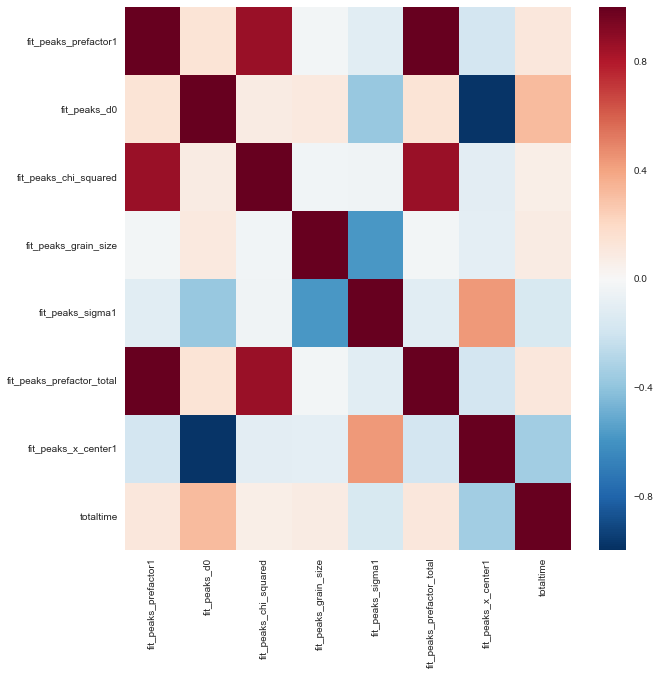

In [24]:
corr = newDF.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,ax = ax)